# Feature Engineering + Basic Model Testing

### 1. Basic Model Testing with Initial Data
##### Testing Models with current features:

In [1]:
#imports 
import requests
import numpy as np
import pandas as pd
#file read
df=pd.read_csv("hurricane_init.csv")
df

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,date,T2M,T10M_RANGE,WD50M,WS2M_RANGE,WD2M,T2MWET,T2M_RANGE,WS2M,CLOUD_AMT,...,within_500,within_750,in3-5_100_miles,in3-5_250_miles,in3-5_500_miles,in3-5_750_miles,remove_100,remove_250,remove_500,remove_750
0,20010601,25.48,2.62,229.30,1.84,229.90,24.10,3.37,1.94,99.98,...,0,0,0,0,0,0,0,0,0,0
1,20010602,25.76,2.91,223.50,1.92,219.90,24.27,3.57,2.10,93.27,...,0,0,0,0,0,0,0,0,0,0
2,20010603,25.53,3.19,270.50,2.30,267.40,23.97,3.87,1.73,85.00,...,0,0,0,0,0,0,0,0,0,0
3,20010604,24.99,1.89,253.80,1.17,250.80,24.03,2.35,2.39,83.00,...,0,0,0,0,0,0,0,0,0,0
4,20010605,25.86,3.67,256.80,2.11,249.70,24.42,4.14,1.58,86.38,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65875,20241126,3.01,2.33,0.40,2.71,101.87,20.71,74.10,22.62,2.69,...,0,0,0,0,0,0,0,0,0,0
65876,20241127,1.41,2.66,0.61,2.92,101.71,20.48,146.10,22.60,1.29,...,0,0,0,0,0,0,0,0,0,0
65877,20241128,1.27,2.26,0.85,2.78,101.75,20.59,103.20,22.83,1.17,...,0,0,0,0,0,0,0,0,0,0
65878,20241129,3.02,3.45,0.79,2.88,101.90,21.11,61.90,23.13,2.67,...,0,0,0,0,0,0,0,0,0,0


### Logisitc Regression:

In [2]:
#very basic logistic regression test as baselines
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_auc_score
import matplotlib.pyplot as plt

In [3]:
#Features to train on
train_features=['T2M', 'T10M_RANGE', 'WD50M', 'WS2M_RANGE', 'WD2M', 'T2MWET',
       'T2M_RANGE', 'WS2M', 'CLOUD_AMT', 'CLOUD_OD', 'SLP', 'PS',
       'WS50M_RANGE', 'T10M', 'WS50M', 'PW', 'RH2M', 'PRECTOTCORR']

##### *Using class weight balanced since high class imbalance in data, otherwise just predicts no hurricanes every time

##### Distance threshold: 100 Miles

In [6]:
my_df=df[~(df['remove_100']==1)]
X=my_df[train_features]
y=my_df["in3-5_100_miles"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

clf=LogisticRegression(penalty='l2',solver='liblinear',class_weight='balanced',max_iter=1000)
clf.fit(X_train_scaled,y_train)

y_pred=clf.predict(X_test_scaled)
y_prob=clf.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test,y_pred))
print("ROC AUC:",roc_auc_score(y_test,y_prob))

              precision    recall  f1-score   support

           0       1.00      0.59      0.74     12998
           1       0.01      0.59      0.02        85

    accuracy                           0.59     13083
   macro avg       0.50      0.59      0.38     13083
weighted avg       0.99      0.59      0.73     13083

ROC AUC: 0.6166432844872062


##### Distance threshold: 250 Miles

In [8]:
my_df=df[~(df['remove_250']==1)]
X=my_df[train_features]
y=my_df["in3-5_250_miles"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

clf=LogisticRegression(penalty='l2',solver='liblinear',class_weight='balanced',max_iter=1000)
clf.fit(X_train_scaled,y_train)

y_pred=clf.predict(X_test_scaled)
y_prob=clf.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test,y_pred))
print("ROC AUC:",roc_auc_score(y_test,y_prob))

              precision    recall  f1-score   support

           0       0.99      0.56      0.72     12681
           1       0.02      0.62      0.04       209

    accuracy                           0.56     12890
   macro avg       0.51      0.59      0.38     12890
weighted avg       0.97      0.56      0.71     12890

ROC AUC: 0.6373329499847


##### Distance threshold: 500 Miles

In [9]:
my_df=df[~(df['remove_500']==1)]
X=my_df[train_features]
y=my_df["in3-5_500_miles"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

clf=LogisticRegression(penalty='l2',solver='liblinear',class_weight='balanced',max_iter=1000)
clf.fit(X_train_scaled,y_train)

y_pred=clf.predict(X_test_scaled)
y_prob=clf.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test,y_pred))
print("ROC AUC:",roc_auc_score(y_test,y_prob))

              precision    recall  f1-score   support

           0       0.97      0.57      0.72     11904
           1       0.05      0.56      0.09       461

    accuracy                           0.57     12365
   macro avg       0.51      0.57      0.40     12365
weighted avg       0.94      0.57      0.70     12365

ROC AUC: 0.6122432095957828


##### Distance threshold: 750 Miles

In [10]:
my_df=df[~(df['remove_750']==1)]
X=my_df[train_features]
y=my_df["in3-5_750_miles"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

clf=LogisticRegression(penalty='l2',solver='liblinear',class_weight='balanced',max_iter=1000)
clf.fit(X_train_scaled,y_train)

y_pred=clf.predict(X_test_scaled)
y_prob=clf.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test,y_pred))
print("ROC AUC:",roc_auc_score(y_test,y_prob))

              precision    recall  f1-score   support

           0       0.96      0.60      0.74     11035
           1       0.08      0.57      0.14       685

    accuracy                           0.60     11720
   macro avg       0.52      0.58      0.44     11720
weighted avg       0.91      0.60      0.70     11720

ROC AUC: 0.6253080609474169


### Random Forrest:

##### Distance threshold: 100 Miles

In [4]:
from sklearn.ensemble import RandomForestClassifier

my_df=df[~(df['remove_100']==1)]
X=my_df[train_features]
y=my_df["in3-5_100_miles"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf=RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42,class_weight='balanced',n_jobs=-1)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_pred))
print("ROC AUC:",roc_auc_score(y_test,y_proba))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     12998
           1       0.02      0.27      0.04        85

    accuracy                           0.91     13083
   macro avg       0.51      0.59      0.49     13083
weighted avg       0.99      0.91      0.95     13083

ROC AUC: 0.7579826760678114


##### Distance threshold: 250 Miles

In [16]:
from sklearn.ensemble import RandomForestClassifier

my_df=df[~(df['remove_250']==1)]
X=my_df[train_features]
y=my_df["in3-5_250_miles"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf=RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42,class_weight='balanced',n_jobs=-1)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_pred))
print("ROC AUC:",roc_auc_score(y_test,y_proba))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91     12681
           1       0.04      0.40      0.07       209

    accuracy                           0.83     12890
   macro avg       0.51      0.62      0.49     12890
weighted avg       0.97      0.83      0.89     12890

ROC AUC: 0.7474489016269301


##### Distance threshold: 500 Miles

In [17]:
from sklearn.ensemble import RandomForestClassifier

my_df=df[~(df['remove_500']==1)]
X=my_df[train_features]
y=my_df["in3-5_500_miles"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf=RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42,class_weight='balanced',n_jobs=-1)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_pred))
print("ROC AUC:",roc_auc_score(y_test,y_proba))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     11904
           1       0.09      0.47      0.15       461

    accuracy                           0.81     12365
   macro avg       0.53      0.64      0.52     12365
weighted avg       0.94      0.81      0.86     12365

ROC AUC: 0.7363807422503674


##### Distance threshold: 750 Miles

In [5]:
from sklearn.ensemble import RandomForestClassifier

my_df=df[~(df['remove_750']==1)]
X=my_df[train_features]
y=my_df["in3-5_750_miles"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf=RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42,class_weight='balanced',n_jobs=-1)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_pred))
print("ROC AUC:",roc_auc_score(y_test,y_proba))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87     11035
           1       0.13      0.49      0.20       685

    accuracy                           0.78     11720
   macro avg       0.55      0.64      0.54     11720
weighted avg       0.91      0.78      0.83     11720

ROC AUC: 0.7305159760417252


##### These results are poor, need to engineer more informative features and tune models

##### Below is a comparison for future evaluation. To sucessfully flag 90% of Hurricanes we have an 8% true positive rate, and only reduce monitoring space by 37%.

In [16]:
threshold = 0.265
my_y_pred = (y_proba >= threshold).astype(int)

print(classification_report(y_test, my_y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.98      0.37      0.54     11035
           1       0.08      0.90      0.15       685

    accuracy                           0.40     11720
   macro avg       0.53      0.64      0.34     11720
weighted avg       0.93      0.40      0.52     11720

ROC AUC: 0.7305159760417252


### 2. Feature Engineering
##### Engineered features for time lags (3 day windows, 5 day windows), including linear regression trend, standard deviation, mean, max, and min. Difference values between certain time windows 1 day prior, 3 days prior, 5 days prior. As well as combinatin features, for example Temperature * Humidity.
###### *Utilized AI assistance for help with quick visuals on this project

##### Checking feature correlation first, none of the features too strongly correlated.

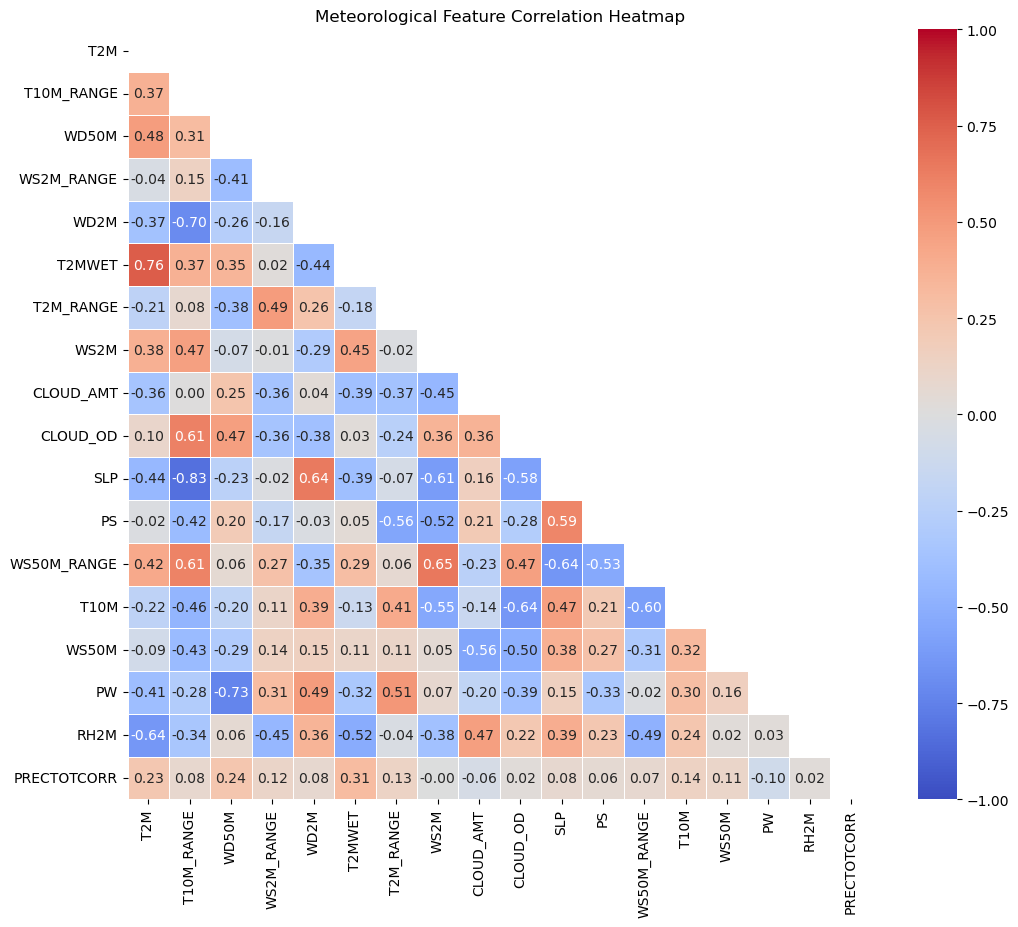

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X_train.corr(method='spearman')
plt.figure(figsize=(12, 10))
mask =np.triu(np.ones_like(corr_matrix,dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',vmin=-1, vmax=1, center=0, linewidths=.5)

plt.title('Meteorological Feature Correlation Heatmap')
plt.show()

#### Features To Add:

##### For all of these # Metrics: Relative Humidity at 2 Meters, Cloud Amount, Sea Level Pressure, Wind Speed at 2 Meters, Temperature at 10 Meters, Precipitable Water, Wind Speed at 50 Meters, Wet Bulb Temperature at 2 Meters, Temperature at 2 Meters, Surface Pressure, Precipitation Corrected

##### Difference from 1 day ago, 3 days ago, 5 days ago

##### Max and Mins in last 3 days, last 5 days, Rolling mean last 3 days and 5 days, Rolling STD last 3 days and 5 days 

##### Linear Trend over last 3 days and 5 days 

##### Joint feature combinations: Temp * Humidity, Temp * Precipitation, Wind Speed * Precipitation, Surface Pressure * Temp, Surface Pressure * Precipitation, Surface Pressure * Wind Speed


In [20]:
df=df.drop(columns=['within_100','within_250','within_500','within_750','lat_storm','lon_storm','storm_severity'])
df

,date,T2M,T10M_RANGE,WD50M,WS2M_RANGE,WD2M,T2MWET,T2M_RANGE,WS2M,CLOUD_AMT,...,location,distance_miles,in3-5_100_miles,in3-5_250_miles,in3-5_500_miles,in3-5_750_miles,remove_100,remove_250,remove_500,remove_750
0,20010601,25.48,2.62,229.30,1.84,229.90,24.10,3.37,1.94,99.98,...,1,1000000.000000,0,0,0,0,0,0,0,0
1,20010602,25.76,2.91,223.50,1.92,219.90,24.27,3.57,2.10,93.27,...,1,1000000.000000,0,0,0,0,0,0,0,0
2,20010603,25.53,3.19,270.50,2.30,267.40,23.97,3.87,1.73,85.00,...,1,1000000.000000,0,0,0,0,0,0,0,0
3,20010604,24.99,1.89,253.80,1.17,250.80,24.03,2.35,2.39,83.00,...,1,1000000.000000,0,0,0,0,0,0,0,0
4,20010605,25.86,3.67,256.80,2.11,249.70,24.42,4.14,1.58,86.38,...,1,1373.121867,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65875,20241126,3.01,2.33,0.40,2.71,101.87,20.71,74.10,22.62,2.69,...,15,1000000.000000,0,0,0,0,0,0,0,0
65876,20241127,1.41,2.66,0.61,2.92,101.71,20.48,146.10,22.60,1.29,...,15,1000000.000000,0,0,0,0,0,0,0,0
65877,20241128,1.27,2.26,0.85,2.78,101.75,20.59,103.20,22.83,1.17,...,15,1000000.000000,0,0,0,0,0,0,0,0
65878,20241129,3.02,3.45,0.79,2.88,101.90,21.11,61.90,23.13,2.67,...,15,1000000.000000,0,0,0,0,0,0,0,0


##### Raw differences from previous day, 3 days ago, and 5 days ago

In [22]:
#difference from previous day, 3 days ago, and 5 days ago
features=['RH2M','CLOUD_AMT','SLP','WS2M','T10M','PW','WS50M','T2MWET','T2M','PS','PRECTOTCORR']

my_df=df.copy()
#sort again just to make sure 
my_df.sort_values(['location','date'], inplace=True)

#time frames 
time_frame=[1,3,5]

#can use a loop to add over different time frames and for each metric 
for feat in features:
    for t in time_frame:
        #name cols based on f string so don't have to do after
        my_df[f'{feat}_diff_{t}days']=my_df.groupby('location')[feat].diff(t)
my_df#remove NaNs after all features constructed 

,date,T2M,T10M_RANGE,WD50M,WS2M_RANGE,WD2M,T2MWET,T2M_RANGE,WS2M,CLOUD_AMT,...,T2MWET_diff_5days,T2M_diff_1days,T2M_diff_3days,T2M_diff_5days,PS_diff_1days,PS_diff_3days,PS_diff_5days,PRECTOTCORR_diff_1days,PRECTOTCORR_diff_3days,PRECTOTCORR_diff_5days
0,20010601,25.48,2.62,229.30,1.84,229.90,24.10,3.37,1.94,99.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20010602,25.76,2.91,223.50,1.92,219.90,24.27,3.57,2.10,93.27,...,NaN,0.28,NaN,NaN,-0.01,NaN,NaN,0.51,NaN,NaN
2,20010603,25.53,3.19,270.50,2.30,267.40,23.97,3.87,1.73,85.00,...,NaN,-0.23,NaN,NaN,-0.09,NaN,NaN,11.13,NaN,NaN
3,20010604,24.99,1.89,253.80,1.17,250.80,24.03,2.35,2.39,83.00,...,NaN,-0.54,-0.49,NaN,0.05,-0.05,NaN,-10.93,0.71,NaN
4,20010605,25.86,3.67,256.80,2.11,249.70,24.42,4.14,1.58,86.38,...,NaN,0.87,0.10,NaN,-0.01,-0.05,NaN,-5.41,-5.21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65875,20241126,3.01,2.33,0.40,2.71,101.87,20.71,74.10,22.62,2.69,...,0.21,-0.68,-1.29,1.00,0.81,-2.23,0.36,0.06,-0.20,0.08
65876,20241127,1.41,2.66,0.61,2.92,101.71,20.48,146.10,22.60,1.29,...,0.15,-1.60,-4.53,-0.65,0.37,0.22,0.66,0.24,-0.40,0.33
65877,20241128,1.27,2.26,0.85,2.78,101.75,20.59,103.20,22.83,1.17,...,-0.51,-0.14,-2.42,-3.03,-0.29,0.89,-2.15,-0.19,0.11,-0.15
65878,20241129,3.02,3.45,0.79,2.88,101.90,21.11,61.90,23.13,2.67,...,-0.96,1.75,0.01,-2.92,0.76,0.84,0.69,1.04,1.09,0.45


##### Sliding window features, mean, std, max, min

In [23]:
slide=[3,5]

#can use a loop to add over different time frames and for each metric 
for feat in features:
    for s in slide:
        g=my_df.groupby('location')[feat]
        my_df[f'{feat}_roll_mean_{s}d']=g.transform(lambda x:x.rolling(window=s, min_periods=1).mean())
        my_df[f'{feat}_roll_std_{s}d']=g.transform(lambda x:x.rolling(window=s, min_periods=1).std())
        my_df[f'{feat}_roll_min_{s}d']=g.transform(lambda x:x.rolling(window=s, min_periods=1).min())
        my_df[f'{feat}_roll_max_{s}d']=g.transform(lambda x:x.rolling(window=s, min_periods=1).max())
my_df#remove NaNs after all features constructed 

/var/folders/gb/xt82k3qn7g799st7d6w24fgm0000gn/T/ipykernel_37117/2048402835.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  my_df[f'{feat}_roll_std_{s}d']=g.transform(lambda x:x.rolling(window=s, min_periods=1).std())
/var/folders/gb/xt82k3qn7g799st7d6w24fgm0000gn/T/ipykernel_37117/2048402835.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  my_df[f'{feat}_roll_min_{s}d']=g.transform(lambda x:x.rolling(window=s, min_periods=1).min())
/var/folders/gb/xt82k3qn7g799st7d6w24fgm0000gn/T/ipykernel_37117/2048402835.py:10: Perform

,date,T2M,T10M_RANGE,WD50M,WS2M_RANGE,WD2M,T2MWET,T2M_RANGE,WS2M,CLOUD_AMT,...,PS_roll_min_5d,PS_roll_max_5d,PRECTOTCORR_roll_mean_3d,PRECTOTCORR_roll_std_3d,PRECTOTCORR_roll_min_3d,PRECTOTCORR_roll_max_3d,PRECTOTCORR_roll_mean_5d,PRECTOTCORR_roll_std_5d,PRECTOTCORR_roll_min_5d,PRECTOTCORR_roll_max_5d
0,20010601,25.48,2.62,229.30,1.84,229.90,24.10,3.37,1.94,99.98,...,99.24,99.24,7.500000,NaN,7.50,7.50,7.500,NaN,7.50,7.50
1,20010602,25.76,2.91,223.50,1.92,219.90,24.27,3.57,2.10,93.27,...,99.23,99.24,7.755000,0.360624,7.50,8.01,7.755,0.360624,7.50,8.01
2,20010603,25.53,3.19,270.50,2.30,267.40,23.97,3.87,1.73,85.00,...,99.14,99.24,11.550000,6.578077,7.50,19.14,11.550,6.578077,7.50,19.14
3,20010604,24.99,1.89,253.80,1.17,250.80,24.03,2.35,2.39,83.00,...,99.14,99.24,11.786667,6.368959,8.01,19.14,10.715,5.624616,7.50,19.14
4,20010605,25.86,3.67,256.80,2.11,249.70,24.42,4.14,1.58,86.38,...,99.14,99.24,10.050000,8.323947,2.80,19.14,9.132,6.021351,2.80,19.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65875,20241126,3.01,2.33,0.40,2.71,101.87,20.71,74.10,22.62,2.69,...,1.13,4.17,0.293333,0.387986,0.04,0.74,0.238,0.302523,0.01,0.74
65876,20241127,1.41,2.66,0.61,2.92,101.71,20.48,146.10,22.60,1.29,...,1.13,4.17,0.160000,0.158745,0.04,0.34,0.304,0.275100,0.04,0.74
65877,20241128,1.27,2.26,0.85,2.78,101.75,20.59,103.20,22.83,1.17,...,1.13,2.31,0.196667,0.126623,0.10,0.34,0.274,0.283690,0.04,0.74
65878,20241129,3.02,3.45,0.79,2.88,101.90,21.11,61.90,23.13,2.67,...,1.13,2.78,0.560000,0.553805,0.15,1.19,0.364,0.475216,0.04,1.19


##### Linear Trend features

In [24]:
#linear trend data, used linear model from sklearn since already imported module, just getting coefficient, built function for this
#AI help used to gen quickly
from sklearn.linear_model import LinearRegression
def linear_trend(x):
    x = np.array(x)
    if len(x) < 2:  # not enough points to fit
        return 0.0
    y = x.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(np.arange(len(x)).reshape(-1,1), y)
    return lr.coef_[0][0]

#adding using same window concept 
slide=[3,5]

#can use a loop to add over different time frames and for each metric 
for feat in features:
    for s in slide:
        my_df[f'{feat}_trend_{s}d'] = my_df.groupby('location')[feat].transform(lambda x:x.rolling(window=s,min_periods=2).apply(linear_trend,raw=False))
my_df#remove NaNs after all features constructed 

/var/folders/gb/xt82k3qn7g799st7d6w24fgm0000gn/T/ipykernel_37117/3109437744.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  my_df[f'{feat}_trend_{s}d'] = my_df.groupby('location')[feat].transform(lambda x:x.rolling(window=s,min_periods=2).apply(linear_trend,raw=False))
/var/folders/gb/xt82k3qn7g799st7d6w24fgm0000gn/T/ipykernel_37117/3109437744.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  my_df[f'{feat}_trend_{s}d'] = my_df.groupby('location')[feat].transform(lambda x:x.rolling(window=s,min_periods=2).apply(linear_tr

,date,T2M,T10M_RANGE,WD50M,WS2M_RANGE,WD2M,T2MWET,T2M_RANGE,WS2M,CLOUD_AMT,...,WS50M_trend_3d,WS50M_trend_5d,T2MWET_trend_3d,T2MWET_trend_5d,T2M_trend_3d,T2M_trend_5d,PS_trend_3d,PS_trend_5d,PRECTOTCORR_trend_3d,PRECTOTCORR_trend_5d
0,20010601,25.48,2.62,229.30,1.84,229.90,24.10,3.37,1.94,99.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20010602,25.76,2.91,223.50,1.92,219.90,24.27,3.57,2.10,93.27,...,0.340,0.340,0.170,0.170,0.280,0.280,-0.010,-0.010,0.510,0.510
2,20010603,25.53,3.19,270.50,2.30,267.40,23.97,3.87,1.73,85.00,...,-0.085,-0.085,-0.065,-0.065,0.025,0.025,-0.050,-0.050,5.820,5.820
3,20010604,24.99,1.89,253.80,1.17,250.80,24.03,2.35,2.39,83.00,...,0.355,0.264,-0.120,-0.051,-0.385,-0.170,-0.020,-0.024,0.100,1.326
4,20010605,25.86,3.67,256.80,2.11,249.70,24.42,4.14,1.58,86.38,...,-0.135,-0.017,0.225,0.040,0.165,-0.001,0.020,-0.016,-8.170,-0.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65875,20241126,3.01,2.33,0.40,2.71,101.87,20.71,74.10,22.62,2.69,...,-0.060,0.966,-0.680,0.049,-1.465,0.129,-0.075,-0.246,-0.320,-0.008
65876,20241127,1.41,2.66,0.61,2.92,101.71,20.48,146.10,22.60,1.29,...,0.070,0.104,-0.175,-0.260,-1.140,-0.871,0.590,-0.387,0.150,-0.056
65877,20241128,1.27,2.26,0.85,2.78,101.75,20.59,103.20,22.83,1.17,...,-1.305,-0.532,-0.060,-0.331,-0.870,-1.162,0.040,0.104,0.025,-0.088
65878,20241129,3.02,3.45,0.79,2.88,101.90,21.11,61.90,23.13,2.67,...,0.510,-0.029,0.315,0.044,0.805,-0.308,0.235,0.338,0.425,0.235


##### Combination features

In [25]:
my_df['T2M_RH2M']=my_df['T2M']*my_df['RH2M']
my_df['T2M_PRECTOTCORR']=my_df['T2M']*my_df['PRECTOTCORR']
my_df['WS2M_PRECTOTCORR']=my_df['WS2M']*my_df['PRECTOTCORR']
my_df['PS_T2M']=my_df['PS']*my_df['T2M']
my_df['PS_PRECTOTCORR']=my_df['PS']*my_df['PRECTOTCORR']
my_df['PS_WS2M']=my_df['PS']*my_df['WS2M']
my_df

/var/folders/gb/xt82k3qn7g799st7d6w24fgm0000gn/T/ipykernel_37117/3034245226.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  my_df['T2M_RH2M']=my_df['T2M']*my_df['RH2M']
/var/folders/gb/xt82k3qn7g799st7d6w24fgm0000gn/T/ipykernel_37117/3034245226.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  my_df['T2M_PRECTOTCORR']=my_df['T2M']*my_df['PRECTOTCORR']
/var/folders/gb/xt82k3qn7g799st7d6w24fgm0000gn/T/ipykernel_37117/3034245226.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

,date,T2M,T10M_RANGE,WD50M,WS2M_RANGE,WD2M,T2MWET,T2M_RANGE,WS2M,CLOUD_AMT,...,PS_trend_3d,PS_trend_5d,PRECTOTCORR_trend_3d,PRECTOTCORR_trend_5d,T2M_RH2M,T2M_PRECTOTCORR,WS2M_PRECTOTCORR,PS_T2M,PS_PRECTOTCORR,PS_WS2M
0,20010601,25.48,2.62,229.30,1.84,229.90,24.10,3.37,1.94,99.98,...,NaN,NaN,NaN,NaN,2167.3288,191.1000,14.5500,2528.6352,744.3000,192.5256
1,20010602,25.76,2.91,223.50,1.92,219.90,24.27,3.57,2.10,93.27,...,-0.010,-0.010,0.510,0.510,2161.2640,206.3376,16.8210,2556.1648,794.8323,208.3830
2,20010603,25.53,3.19,270.50,2.30,267.40,23.97,3.87,1.73,85.00,...,-0.050,-0.050,5.820,5.820,2127.9255,488.6442,33.1122,2531.0442,1897.5396,171.5122
3,20010604,24.99,1.89,253.80,1.17,250.80,24.03,2.35,2.39,83.00,...,-0.020,-0.024,0.100,1.326,2229.1080,205.1679,19.6219,2478.7581,814.3499,237.0641
4,20010605,25.86,3.67,256.80,2.11,249.70,24.42,4.14,1.58,86.38,...,0.020,-0.016,-8.170,-0.920,2184.1356,72.4080,4.4240,2564.7948,277.7040,156.7044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65875,20241126,3.01,2.33,0.40,2.71,101.87,20.71,74.10,22.62,2.69,...,-0.075,-0.246,-0.320,-0.008,222.4390,0.3010,2.2620,5.8394,0.1940,43.8828
65876,20241127,1.41,2.66,0.61,2.92,101.71,20.48,146.10,22.60,1.29,...,0.590,-0.387,0.150,-0.056,205.7190,0.4794,7.6840,3.2571,0.7854,52.2060
65877,20241128,1.27,2.26,0.85,2.78,101.75,20.59,103.20,22.83,1.17,...,0.040,0.104,0.025,-0.088,130.3020,0.1905,3.4245,2.5654,0.3030,46.1166
65878,20241129,3.02,3.45,0.79,2.88,101.90,21.11,61.90,23.13,2.67,...,0.235,0.338,0.425,0.235,186.9380,3.5938,27.5247,8.3956,3.3082,64.3014


##### Removing first 5 days of data as not sufficient data for sliding windows, writing final DataFrame to file.

In [26]:
df=my_df.copy()
df=df[df['date'] != 20010601]
df=df[df['date'] != 20010602]
df=df[df['date'] != 20010603]
df=df[df['date'] != 20010604]
df=df[df['date'] != 20010605]
df.to_csv("hurricanes_final_data.csv",index=False)

##### Final Data:

In [27]:
df=pd.read_csv("hurricanes_final_data.csv")
df

,date,T2M,T10M_RANGE,WD50M,WS2M_RANGE,WD2M,T2MWET,T2M_RANGE,WS2M,CLOUD_AMT,...,PS_trend_3d,PS_trend_5d,PRECTOTCORR_trend_3d,PRECTOTCORR_trend_5d,T2M_RH2M,T2M_PRECTOTCORR,WS2M_PRECTOTCORR,PS_T2M,PS_PRECTOTCORR,PS_WS2M
0,20010606,26.49,3.75,266.40,1.01,261.00,24.76,4.48,1.13,97.83,...,-0.035,-1.800000e-02,0.180,-1.522,2163.7032,227.0193,9.6841,2625.6888,849.4584,112.0056
1,20010607,26.75,3.96,11.90,0.94,4.80,25.15,4.52,1.56,90.09,...,-0.105,-4.100000e-02,-0.935,-3.606,2219.7150,24.8775,1.4508,2647.4475,92.0421,154.3932
2,20010608,26.16,2.64,38.60,0.94,201.50,24.99,3.40,2.00,85.39,...,-0.070,-6.300000e-02,-2.385,-1.069,2282.1984,99.4080,7.6000,2589.3168,376.1240,197.9600
3,20010609,26.55,4.31,43.50,2.12,48.80,25.08,4.72,1.64,99.37,...,0.020,-4.800000e-02,2.720,0.237,2241.8820,169.1235,10.4468,2628.7155,630.6937,162.3764
4,20010610,27.05,3.91,143.80,1.24,171.00,25.20,4.35,1.08,92.59,...,0.060,-1.421888e-15,-1.435,-0.984,2183.4760,25.1565,1.0044,2680.6550,92.1630,107.0280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65800,20241126,3.01,2.33,0.40,2.71,101.87,20.71,74.10,22.62,2.69,...,-0.075,-2.460000e-01,-0.320,-0.008,222.4390,0.3010,2.2620,5.8394,0.1940,43.8828
65801,20241127,1.41,2.66,0.61,2.92,101.71,20.48,146.10,22.60,1.29,...,0.590,-3.870000e-01,0.150,-0.056,205.7190,0.4794,7.6840,3.2571,0.7854,52.2060
65802,20241128,1.27,2.26,0.85,2.78,101.75,20.59,103.20,22.83,1.17,...,0.040,1.040000e-01,0.025,-0.088,130.3020,0.1905,3.4245,2.5654,0.3030,46.1166
65803,20241129,3.02,3.45,0.79,2.88,101.90,21.11,61.90,23.13,2.67,...,0.235,3.380000e-01,0.425,0.235,186.9380,3.5938,27.5247,8.3956,3.3082,64.3014
